# Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Iris_dataset.csv')

In [3]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [12]:
df_setosa=df.loc[df['variety']=='Setosa'][['petal.length','petal.width']]

In [14]:
df_setosa_train=df_setosa[:-10]
df_setosa_test=df_setosa[-10:]

In [15]:
df_virginica=df.loc[df['variety']=='Virginica'][['petal.length','petal.width']]

In [16]:
df_virginica_train=df_virginica[:-10]
df_virginica_test=df_virginica[-10:]

In [17]:
df_versicolor=df.loc[df['variety']=='Versicolor'][['petal.length','petal.width']]

In [18]:
df_versicolor_train=df_versicolor[:-10]
df_versicolor_test=df_versicolor[-10:]

In [19]:
pw_s=50/150
pw_vir=50/150
pw_ver=50/150

Find P(ωi|X) =P(X|ωi).P(ωi)/P(X)

P(X) is a constant for all classes; so it can be ignored.

![image](g)

### Calculating mean

In [88]:
mean_vir=df_virginica_train.mean(axis=0).to_numpy()

In [89]:
mean_vir

array([5.6075, 1.99  ])

In [90]:
mean_s=df_setosa_train.mean().to_numpy()

In [91]:
mean_s

array([1.46 , 0.235])

In [92]:
mean_ver=df_versicolor_train.mean().to_numpy()

In [93]:
mean_ver

array([4.3175, 1.35  ])

### Covariance

In [81]:
cov_vir=df_virginica_train.cov().to_numpy()

In [82]:
cov_vir

array([[0.34532692, 0.05930769],
       [0.05930769, 0.07425641]])

In [83]:
cov_ver=df_versicolor_train.cov().to_numpy()

In [84]:
cov_ver

array([[0.20353205, 0.07371795],
       [0.07371795, 0.04307692]])

In [86]:
cov_s=df_setosa_train.cov().to_numpy()

In [87]:
cov_s

array([[0.02964103, 0.00502564],
       [0.00502564, 0.00951282]])

### det and inv of det

**Setosa**

In [38]:
det_cov_s=np.linalg.det(cov_s)
det_cov_s

0.0002567126890203812

In [39]:
inv_cov_s=np.linalg.inv(cov_s)
inv_cov_s

array([[ 37.05629258, -19.57690929],
       [-19.57690929, 115.46381191]])

**Versicolor**

In [41]:
det_cov_ver=np.linalg.det(cov_ver)
det_cov_ver

0.0033331985535831675

In [42]:
inv_cov_ver=np.linalg.inv(cov_ver)
inv_cov_ver

array([[ 12.92359947, -22.11627886],
       [-22.11627886,  61.06208436]])

**Virginica**

In [43]:
det_cov_vir=np.linalg.det(cov_vir)
det_cov_vir

0.022125335305719893

In [44]:
inv_cov_vir=np.linalg.inv(cov_vir)
inv_cov_vir

array([[ 3.35617107, -2.68053304],
       [-2.68053304, 15.60775999]])

### Function for calculating P(X/wi)

In [45]:
def cal_prob(dim,det,X,mean,inverse):
    t1=1/( (np.pi**(dim/2)) * (det**0.5))
    t2=(np.subtract(X,mean).T) @ inverse @ (np.subtract(X,mean))
    return t1 * np.exp(-0.5 * t2)

### Finding probability

In [47]:
def predict(X):
    p_setosa=cal_prob(4,det_cov_s,X,mean_s,inv_cov_s)
    p_virg=cal_prob(4,det_cov_vir,X,mean_vir,inv_cov_vir)
    p_versi=cal_prob(4,det_cov_ver,X,mean_ver,inv_cov_ver)
    
    class_pred=max(p_setosa,p_versi,p_virg)
#     print(p_setosa,p_versi,p_virg)
    
    if(class_pred==p_setosa):
        return "Setosa"
    elif (class_pred==p_virg):
        return "Virginica"
    else:
        return "Versicolor"

#### Testing setosa

In [48]:
results_setosa=[]
for i in range(10):
    results_setosa.append(predict(df_setosa_test[df_setosa_test.columns[:2]].iloc[i]))

In [49]:
results_setosa

['Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa']

#### Testing virginica

In [53]:
results_virginica=[]
for i in range(10):
    results_virginica.append(predict(df_virginica_test[df_virginica_test.columns[:2]].iloc[i]))
results_virginica

['Virginica',
 'Virginica',
 'Virginica',
 'Virginica',
 'Virginica',
 'Virginica',
 'Virginica',
 'Virginica',
 'Virginica',
 'Virginica']

#### Testing versicolor

In [54]:
results_versicolor=[]
for i in range(10):
    results_versicolor.append(predict(df_versicolor_test[df_versicolor_test.columns[:2]].iloc[i]))
results_versicolor

['Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor',
 'Versicolor']

### Finding discriminant function

In [55]:
def gi(x,mean,cov,p_w):
  t1=-0.5 *(np.subtract(x,mean)).T @ np.linalg.inv(cov) @ np.subtract(x,mean)
  t2=-0.5 *np.log(np.linalg.det(cov))
  t3=np.log(p_w)
  return t1+t2+t3
 

In [56]:
from sympy import Matrix, solve, symbols

In [57]:
x,y=symbols('x y')

In [58]:
M=Matrix([x,y])

In [59]:
M

Matrix([
[x],
[y]])

In [95]:
gs=gi(M,mean_s.reshape(2,1),cov_s,pw_s)
gver=gi(M,mean_ver.reshape(2,1),cov_ver,pw_ver)
gvir=gi(M,mean_vir.reshape(2,1),cov_vir,pw_vir)

In [101]:
gs

array([[(x - 1.46)*(-18.5281462889925*x + 9.7884546432413*y + 24.7508067407673) + (y - 0.235)*(9.7884546432413*x - 57.7319059570763*y - 0.724145879219371) + 3.03516423132528]],
      dtype=object)

In [102]:
gver

array([[(x - 4.3175)*(-6.46179973746473*x + 11.0581394316733*y + 12.970332133745) + (y - 1.35)*(11.0581394316733*x - 30.531042182179*y - 6.52661005030772) + 1.75329916603125]],
      dtype=object)

In [103]:
gvir

array([[(x - 5.6075)*(-1.67808553475827*x + 1.34026651999168*y + 6.74273426137359) + (y - 1.99)*(1.34026651999168*x - 7.80387999334971*y + 8.0141766759126) + 0.806903677902987]],
      dtype=object)

In [104]:
g1=np.subtract(gs[0][0],gver[0][0])

In [115]:
soln1=solve(g1,(x,y))
soln1

[(-0.105225287787813*y - 1.49773251021777*sqrt(-y**2 + 0.3371497669708*y + 0.886891456254722) + 0.976308326361697,
  y),
 (-0.105225287787813*y + 1.49773251021777*sqrt(-y**2 + 0.3371497669708*y + 0.886891456254722) + 0.976308326361697,
  y)]

In [106]:
g2=np.subtract(gver[0][0],gvir[0][0])

In [107]:
solve(g2,(x,y))

[(2.03144930902929*y - 1.80718968717782*sqrt(-0.191111765271152*y**2 - 0.241912736222108*y + 1) + 1.30183317992703,
  y),
 (2.03144930902929*y + 1.80718968717782*sqrt(-0.191111765271152*y**2 - 0.241912736222108*y + 1) + 1.30183317992703,
  y)]

In [108]:
g3=np.subtract(gs[0][0],gvir[0][0])

In [109]:
solve(g3,(x,y))

[(0.501374341996167*y - 1.64672422701142*sqrt(-y**2 + 0.0127138620757258*y + 0.859357062158796) + 1.06872448367099,
  y),
 (0.501374341996167*y + 1.64672422701142*sqrt(-y**2 + 0.0127138620757258*y + 0.859357062158796) + 1.06872448367099,
  y)]

TypeError: can't convert complex to float

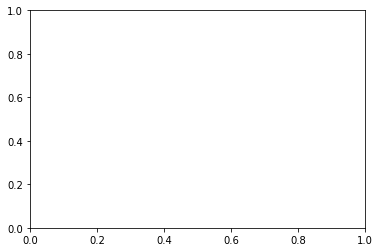

In [117]:
values=np.arange(1,10,1)
plt.plot([soln1[0][0].subs(y,i) for i in values],values)
plt.scatter(x=df_setosa['petal.length'],y=df_setosa['petal.width'])
plt.scatter(x=df_versicolor['petal.length'],y=df_versicolor['petal.width'])
plt.title("Decision boundary")
plt.show()

In [118]:
[soln1[0][0].subs(y,i) for i in values]

[0.162161413417612,
 0.76585775078607 - 2.33896192523251*I,
 0.660632462998257 - 3.99129815853382*I,
 0.555407175210443 - 5.55667026530007*I,
 0.45018188742263 - 7.09289173952*I,
 0.344956599634817 - 8.61557005450936*I,
 0.239731311847003 - 10.130813730599*I,
 0.13450602405919 - 11.6415261743619*I,
 0.0292807362713761 - 13.1492692510626*I]